## Исследование данных о российском кинопрокате



Исследование данных о российском конопроката проводится по заказу Министерства культуры Российской Федерации с целью изучить рынок российского кинопроката и выявлению текущих трендов.

К исследованию представлены данные, опубликованные на портале открытых данных Министерства культуры, а также информация с сайта КиноПоиск.

**Описание данных**

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений.

**-title**
*- название фильма;*

**-puNumber**
*- номер прокатного удостоверения;*

**-show_start_date**
*-дата премьеры фильма;*

**-type**
*- тип фильма;*

**-film_studio**
*- студия-производитель;*

**-production_country**
*-страна-производитель;*

**-director**
*- режиссёр;*

**-producer**
*- продюсер;*

**-age_restriction**
*- возрастная категория;*

**-refundable_support**
*- объём возвратных средств государственной поддержки;*

**-nonrefundable_support**
*- объём невозвратных средств государственной поддержки;*

**-financing_source**
*- источник государственного финансирования;*

**-budget**
*- общий бюджет фильма;*

**-ratings**
*- рейтинг фильма на КиноПоиске;*

**-genres**
*- жанр фильма.*

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.

**-puNumber**
*- номер прокатного удостоверения;*

**-box_office**
*- сборы в рублях.*

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
import seaborn as sns
import re

Загружаем и открываем файлы с данными.

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

try:
    data_1=pd.read_csv('.csv')
    data_2=pd.read_csv('.csv')
except:
    data_1=pd.read_csv('.csv')
    data_2=pd.read_csv('.csv')

In [3]:
data_1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
data_2.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Изменим тип данных в столбце puNumber с int64 на str, чтобы при объединении объектов данные столбца, по которому идет объединение, были одного типа.

In [7]:
data_2['puNumber']=data_2['puNumber'].astype('str')
data_2['puNumber']

0       111000113
1       111000115
2       111000116
3       111000117
4       111000118
          ...    
3153    224014814
3154    224021411
3155    224022410
3156    224023210
3157    224026410
Name: puNumber, Length: 3158, dtype: object

Объединяем данные в один датафрейм.

In [8]:
data=data_1.merge(data_2, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Выведем названия столбцов датафрейма, приведем их к одному виду.

In [9]:
data.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [10]:
data=data.rename(columns={'puNumber':'pu_number','nonrefundable_support':'non_refundable_support'})

In [11]:
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'non_refundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Переименованы 2 столбца -'puNumber' в 'pu_number' и 'nonrefundable_support' в 'non_refundable_support'.

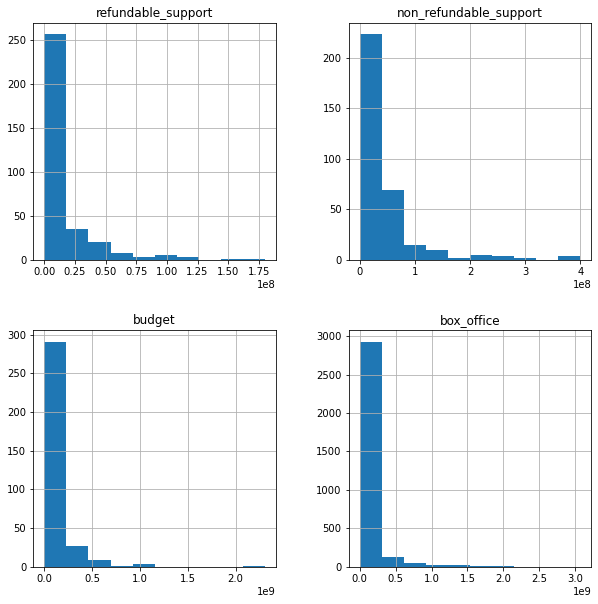

In [12]:
data.hist(figsize=(10,10));

In [13]:
data.describe()

,refundable_support,non_refundable_support,budget,box_office
count,332.00,332.00,332.00,"3,158.00"
mean,"11,864,457.83","48,980,988.89","127,229,716.68","76,478,696.16"
std,"24,916,555.26","59,980,117.92","188,588,333.12","240,353,122.82"
min,0.00,0.00,0.00,0.00
25%,0.00,"25,000,000.00","42,000,000.00","86,239.00"
50%,0.00,"30,000,000.00","68,649,916.00","2,327,987.55"
75%,"15,000,000.00","40,375,000.00","141,985,319.50","23,979,671.02"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   7486 non-null   object 
 1   pu_number               7486 non-null   object 
 2   show_start_date         7486 non-null   object 
 3   type                    7486 non-null   object 
 4   film_studio             7468 non-null   object 
 5   production_country      7484 non-null   object 
 6   director                7477 non-null   object 
 7   producer                6918 non-null   object 
 8   age_restriction         7486 non-null   object 
 9   refundable_support      332 non-null    float64
 10  non_refundable_support  332 non-null    float64
 11  budget                  332 non-null    float64
 12  financing_source        332 non-null    object 
 13  ratings                 6519 non-null   object 
 14  genres                  6510 non-null   

 **Вывод:**

***Всего файл содержит 7486 записей по объектам рынка российского кинопроката, 16 столбцов признаков (4 количественных, 11 категориальных и 1 временной). Для части столбцов видим наличие пропущенных значений. Переименованы 2 столбца -'puNumber' в 'pu_number' и 'nonrefundable_support' в 'non_refundable_support'.***

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   7486 non-null   object 
 1   pu_number               7486 non-null   object 
 2   show_start_date         7486 non-null   object 
 3   type                    7486 non-null   object 
 4   film_studio             7468 non-null   object 
 5   production_country      7484 non-null   object 
 6   director                7477 non-null   object 
 7   producer                6918 non-null   object 
 8   age_restriction         7486 non-null   object 
 9   refundable_support      332 non-null    float64
 10  non_refundable_support  332 non-null    float64
 11  budget                  332 non-null    float64
 12  financing_source        332 non-null    object 
 13  ratings                 6519 non-null   object 
 14  genres                  6510 non-null   

Рассмотрим данные в столбце 'ratings'-райтинг фильма на КиноПоиске.

In [16]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Данные неоднородны, встречается знак %. Уберем знак %, после чего изменим тип данных в столбце на 'float', чтобы в дальнейших исследованиях работать с числовыми данными.

In [17]:
data['ratings']=data['ratings'].astype('str')

In [18]:
data['ratings']=[_.replace('%','') for _ in data['ratings']]

In [19]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', 'nan', '8.2', '7.5', '6.7', '7.9', '5.9', '6.2',
       '5.6', '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5',
       '5.1', '5.7', '5.4', '99', '4.4', '4.5', '5.3', '4.1', '8.4',
       '2.6', '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2',
       '4.7', '4.9', '3.9', '2.7', '3.3', '2.9', '28', '3.7', '1.4',
       '3.1', '97', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2',
       '3.4', '1.1', '3.6', '83', '64', '91', '94', '62', '79', '90',
       '19', '88', '1.0', '89', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0',
       '98', '8.9', '9.1'], dtype=object)

In [20]:
data['ratings']=data['ratings'].astype('float')

In [21]:
data['ratings']

0      7.20
1      6.60
2      6.80
3      6.80
4      6.80
       ... 
7481    NaN
7482   5.40
7483    NaN
7484    NaN
7485   6.30
Name: ratings, Length: 7486, dtype: float64

Приводим к типу даты дату публикации 'show_start_date' - дата премьеры фильма.

In [22]:
data['show_start_date']=pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
data['show_start_date']

0      2015-11-27 12:00:00+00:00
1      2016-09-13 12:00:00+00:00
2      2016-10-10 12:00:00+00:00
3      2016-06-10 12:00:00+00:00
4      2015-07-29 12:00:00+00:00
                  ...           
7481   2019-12-23 12:00:00+00:00
7482   2019-12-24 12:00:00+00:00
7483   2019-12-28 12:00:00+00:00
7484   2019-12-30 12:00:00+00:00
7485   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7486, dtype: datetime64[ns, UTC]

Методом datetime() превращаем в понятные для Python даты из типа object в тип datetime в столбце show_start_date -дата премьеры фильма.

Данные в столбце ratings-райтинг фильма на КиноПоиске привели к типу float.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Посмотрим в каких столбцах какое количество данных пропущено.

In [23]:
data.isnull().sum()

title                        0
pu_number                    0
show_start_date              0
type                         0
film_studio                 18
production_country           2
director                     9
producer                   568
age_restriction              0
refundable_support        7154
non_refundable_support    7154
budget                    7154
financing_source          7154
ratings                    967
genres                     976
box_office                4328
dtype: int64

In [24]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.200000
production_country,0.000000
director,0.100000
producer,7.600000
age_restriction,0.000000
refundable_support,95.600000


**1.2.2.1 Рассмотрим пропуски в столбце 'film_studio'- студия-производитель.**

In [25]:
data['film_studio'].isnull().sum()

18

In [26]:
def nan_ratio (column):
    return  print('Пропущено {:.1%}'.format(data[column].isna().value_counts()[1]/len(data),2) +  'значений')

In [27]:
nan_ratio('film_studio')

Пропущено 0.2%значений


In [28]:
data.dropna(subset=['film_studio'], inplace=True)

In [29]:
data['film_studio'].isna().value_counts()

False    7468
Name: film_studio, dtype: int64

В данных столбца с названием студии-производителя - film_studio было пропущено 18 или 0.2% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или необязательное поле для заполнения, а также мог иметь место технический сбой.

Пропущенные значения с названием студии-производителя были удалены, так как невозможно восстановить корректные значения и количество пропущенных значений составляет 0.2%, их удаление не приведет к искажению результатов исследования.

**1.2.2.2 Рассмотрим пропуски в столбце 'production_country'- страна-производитель.**

In [30]:
data['production_country'].isnull().sum()

1

In [31]:
nan_ratio('production_country')

Пропущено 0.0%значений


In [32]:
data.dropna(subset=['production_country'],inplace=True)

In [33]:
data['production_country'].isna().value_counts()

False    7467
Name: production_country, dtype: int64

В данных столбца с названием страны-производителя - production_country было пропущено 1 или 0.0% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности, мог иметь место технический сбой.

Пропущенные значения с названием страны-производителя были удалены, так как невозможно восстановить корректные значения и количество пропущенных значений составляет 0.0%, их удаление не приведет к искажению результатов исследования.

**1.2.2.3 Рассмотрим пропуски в столбце 'director'- режиссёр.**

In [34]:
data['director'].isnull().sum()

8

In [35]:
nan_ratio('director')

Пропущено 0.1%значений


In [36]:
data.dropna(subset=['director'],inplace=True)

In [37]:
data['director'].isna().value_counts()

False    7459
Name: director, dtype: int64

В данных столбца с именем режиссёра - director было пропущено 8 или 0.1% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности, возможно, необязательное поле для заполнения, а также мог иметь место технический сбой.

Пропущенные значения с именем режиссёра были удалены, так как невозможно восстановить корректные значения и количество пропущенных значений составляет 0.1%, их удаление не приведет к искажению результатов исследования.

**1.2.2.4 Рассмотрим пропуски в столбце 'producer'- продюсер.**

In [38]:
data['producer'].isnull().sum()

564

In [39]:
nan_ratio('producer')

Пропущено 7.6%значений


In [40]:
data['producer'].value_counts()

П.Смирнов                                                                                                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                                                                    28
С.Сельянов                                                                                                                       18
Д.Ловейко, О.Кузовков                                                                                                            17
А.Тельнов                                                                                                                        11
                                                                                                                                 ..
Э.Илоян, В.Шляппо, А.Троцюк, Д.Жалинский, Д.Дьяченко, М.Ткаченко, А.Рубцов                                                        1
Люси Фишер, Пуйа Шахбазян, Дуглас Уик                                       

In [41]:
data['producer']=data['producer'].fillna('unknown')

In [42]:
data['producer'].isna().value_counts()

False    7459
Name: producer, dtype: int64

В данных столбца с именем продюсера - producer было пропущено 564 или 7.6% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности, но, скорее всего, это необязательное поле для заполнения, а также мог иметь место технический сбой.

Пропущенные значения с именем продюсера были заменены на значение 'unknown', так как невозможно восстановить корректные значения.

**1.2.2.5 Рассмотрим пропуски в столбце 'refundable_support'- объем возвратных средств государственной поддержки.**

In [43]:
data['refundable_support'].isnull().sum()

7127

In [44]:
nan_ratio('refundable_support')

Пропущено 95.5%значений


In [45]:
data['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

В данных столбца refundable_support -объём возвратных средств государственной поддержки было пропущено 7127 или 95.5% значений. Можно предположить, что заполнены значения только для тех фильмов, которые получили государственную поддержку.

Пропущенные значения объёмов возвратных средств государственной поддержки оставлены незаполненными. Дальнейшие исследования для фильмов, получившим государственную поддержку, будут производиться с имеющимися заполненными данными.

**1.2.2.6 Рассмотрим пропуски в столбце 'non_refundable_support'- объем невозвратных средств государственной поддержки.**

In [46]:
nan_ratio('non_refundable_support')

Пропущено 95.5%значений


In [47]:
data['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

In [48]:
data['budget'].isnull().sum()

7127

В данных столбца nun_refundable_support -объём невозвратных средств государственной поддержки было пропущено 7127 или 95.5% значений. Можно предположить, что заполнены значения только для тех фильмов, которые получили государственную поддержку.

Пропущенные значения объёмов возвратных средств негосударственной поддержки оставлены незаполненными. Дальнейшие исследования для фильмов, получившим государственную поддержку, будут производиться с имеющимися заполненными данными.

**1.2.2.7 Рассмотрим пропуски в столбце 'budget'- общий бюджет фильма.**

In [49]:
data['budget'].isnull().sum()

7127

In [50]:
nan_ratio('budget')

Пропущено 95.5%значений


В данных столбца budget -общий бюджет фильма было пропущено 7127 или 95.5% значений. Можно предположить, что заполнены значения только для тех фильмов, которые получили государственную поддержку.

Пропущенные значения общего бюджета фильма оставлены незаполненными. Дальнейшие исследования для фильмов, получившим государственную поддержку, будут производиться с имеющимися заполненными данными.

**1.2.2.8 Рассмотрим пропуски в столбце 'financing_source'- источник государственного финансирования.**

In [51]:
data['financing_source'].isnull().sum()

7127

In [52]:
nan_ratio('financing_source')

Пропущено 95.5%значений


In [53]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

В данных столбца financing_source -источник государственного финансирования было пропущено 7127 или 95.5% значений. Можно предположить, что заполнены значения только для тех фильмов, которые получили государственную поддержку.

Пропущенные значения источников государственного финансирования оставлены незаполненными. Дальнейшие исследования для фильмов, получившим государственную поддержку, будут производиться с имеющимися заполненными данными.

**1.2.2.8 Рассмотрим пропуски в столбце 'box_office'- сборы в рублях.**

In [54]:
data['box_office'].isnull().sum()

4304

In [55]:
nan_ratio('box_office')

Пропущено 57.7%значений


In [56]:
data['box_office'].unique()

array([           nan, 2.70000000e+03, 3.60000000e+02, ...,
       3.14379050e+06, 1.80017724e+07, 2.19569000e+05])

В данных столбца box_office -сборы в рублях было пропущено 4304 или 57.7 % значений. Можно предположить, что статистика по сборам велась не по всем фильмам или в наше распоряжение попала только часть информации.

Пропущенные значения сборов в рублях оставлены незаполненными. Дальнейшие исследования для фильмов, по сборам от проката которых имеются данные, будут проводится с учетом отсутствия информации по остальным фильмам.

**1.2.2.9 Рассмотрим пропуски в столбце 'ratings'- рейтинг фильма на КиноПоиске.**

In [57]:
data['ratings'].isnull().sum()

948

In [58]:
nan_ratio('ratings')

Пропущено 12.7%значений


Посмотрим срез данных, где рейтинг фильмов больше или равен 10.

In [59]:
data[(data.ratings>=10)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99.00,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28.00,"детский,приключения,комедия","1,740.00"
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97.00,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99.00,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99.00,"аниме,мультфильм,ужасы","4,295.00"
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83.00,NaN,"1,429,859.00"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64.00,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2126,Поездка к матери,111002015,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91.00,"драма,семейный",0.00
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94.00,"фантастика,боевик,комедия","334,750.00"
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62.00,"фэнтези,семейный",NaN


Приводим выбивающиеся данные, разделив на 10. и проверяем.

In [60]:
data.loc[data['ratings']>=10,'ratings']=data.loc[data['ratings']>=10,'ratings']/10

In [61]:
data[(data.ratings>=10)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office


In [62]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [63]:
data['ratings'].describe()

count   6,511.00
mean        6.49
std         1.11
min         1.00
25%         5.90
50%         6.60
75%         7.20
max         9.90
Name: ratings, dtype: float64

В данных столбца ratings -рейтинг фильма на КиноПоиске было пропущено 948 или 12.7 % значений. Можно предположить, имел место человеческий фактор - не все данные заполнялись, либо данная информация была необязательна для заполнения, возможно, технический сбой. Часть заполненных данных отображалась некорректно.

Пропущенные значения рейтинга фильма на КиноПоиске оставлены незаполненными, так как невозможно заменить корректными значениями.

**1.2.2.10 Рассмотрим пропуски в столбце 'genres'- жанр фильма.**

In [64]:
data['genres'].isnull().sum()

957

In [65]:
nan_ratio('genres')

Пропущено 12.8%значений


In [66]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [67]:
data['genres'].value_counts()

драма                           476
комедия                         351
мелодрама,комедия               222
драма,мелодрама,комедия         189
драма,мелодрама                 183
                               ... 
мюзикл,мелодрама,фэнтези          1
документальный,новости,драма      1
семейный,детектив,детский         1
комедия,история,драма             1
мелодрама,история,драма           1
Name: genres, Length: 741, dtype: int64

В данных столбца genres -жанр фильма было пропущено 957 или 12.8 % значений. Можно предположить, имел место человеческий фактор - не все данные заполнялись, либо данная информация была необязательна для заполнения, возможно, технический сбой. 

Пропущенные значения жанра фильма не заполнялись, так как нет возможности заполнить корректными значениями.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [68]:
data.duplicated().sum()

0

Явных дубликатов не выявлено.

Проверим на неявные дубликаты столбец title -название фильма.

In [69]:
data['title'].value_counts()

День святого Валентина_                                                                                                      5
Робин Гуд (Robin Hood)                                                                                                       4
Безумцы                                                                                                                      4
Рапунцель: Запутанная история                                                                                                4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/                                                                  4
                                                                                                                            ..
Самые правдивые истории                                                                                                      1
Пионеры-герои.                                                                                                 

Посмотрим информацию по нескольким фильмам, где неявные дубликаты выявлены в названии фильма -title.

In [70]:
data[(data.title=='День святого Валентина_')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN


In [71]:
data[(data.title=='Знакомство с Факерами 2.')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
4129,Знакомство с Факерами 2.,121021710,2010-11-25 12:00:00+00:00,Художественный,"Парамаунт Пикчерз, Юниверсал Пикчерз, ДУ Студи...",США,Пол Вайц,"Роберт Де Ниро, Джон Гамбург, Джей Роач, Джейн...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.20,"мелодрама,комедия",NaN
4886,Знакомство с Факерами 2.,221034211,2011-04-05 12:00:00+00:00,Художественный,"Парамаунт Пикчерз, Юниверсал Пикчерз, ДУ Студи...",США,Пол Вайц,"Роберт Де Ниро, Джон Гамбург, Джей Роач, Джейн...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.20,"мелодрама,комедия",NaN
4989,Знакомство с Факерами 2.,221049411,2011-03-30 12:00:00+00:00,Художественный,"Парамаунт Пикчерз, Юниверсал Пикчерз, ДУ Студи...",США,Пол Вайц,"Роберт Де Ниро, Джон Гамбург, Джей Роач, Джейн...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.20,"мелодрама,комедия",NaN
5390,Знакомство с Факерами 2.,221117511,2011-11-15 12:00:00+00:00,Художественный,"Парамаунт Пикчерз, Юниверсал Пикчерз, ДУ Студи...",США,Пол Вайц,"Роберт Де Ниро, Джон Гамбург, Джей Роач, Джейн...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.20,"мелодрама,комедия",NaN


In [72]:
data[(data.title=='Дорога /По новелле Кормака МкКарфи/')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
356,Дорога /По новелле Кормака МкКарфи/,221010415,2015-04-03 12:00:00+00:00,Художественный,"Дименшн Филмс, Род Ребел, Чокстоун Пикчерз",США,Джон Хиллкоут,Паула Мэй Шварц,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,драма,NaN
4003,Дорога /По новелле Кормака МкКарфи/,121009410,2010-05-26 12:00:00+00:00,Художественный,"Дименшн Филмс, Род Ребел, Чокстоун Пикчерз",США,Джон Хиллкоут,Паула Мэй Шварц,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,драма,NaN
4582,Дорога /По новелле Кормака МкКарфи/,221157110,2010-12-17 12:00:00+00:00,Художественный,"Дименшн Филмс, Род Ребел, Чокстоун Пикчерз",США,Джон Хиллкоут,Паула Мэй Шварц,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,драма,NaN
4735,Дорога /По новелле Кормака МкКарфи/,221082210,2010-10-14 12:00:00+00:00,Художественный,"Дименшн Филмс, Род Ребел, Чокстоун Пикчерз",США,Джон Хиллкоут,Паула Мэй Шварц,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,драма,NaN


In [74]:
data[data['title'].isin(data['title'].value_counts()[data['title'].value_counts()>1].index)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


In [73]:
data[data['title'].isin(data['title'].value_counts()[data['title'].value_counts()>1].index)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 2 to 7474
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   title                   1270 non-null   object             
 1   pu_number               1270 non-null   object             
 2   show_start_date         1270 non-null   datetime64[ns, UTC]
 3   type                    1270 non-null   object             
 4   film_studio             1270 non-null   object             
 5   production_country      1270 non-null   object             
 6   director                1270 non-null   object             
 7   producer                1270 non-null   object             
 8   age_restriction         1270 non-null   object             
 9   refundable_support      5 non-null      float64            
 10  non_refundable_support  5 non-null      float64            
 11  budget                  5 non-null      flo

Всего 1270 строк, где название фильма встречается более одного раза. В то же время во всех случаях номер прокатного удостоверения и дата премьеры фильма - это разные значения. Один фильм может иметь несколько прокатных удостоверений в случае, если они выдавались в разнае сроки и для разных прокатных целей. Также фильм мог поменять правообладателя или даже быть немного изменендля каких-либо творческих или коммерческих целей - с документальной точки зрения это требует выдачи новой "прокатки".

Данные столбца оставляю без изменений.

Проверим на неявные дубликаты столбец pu_number -номер прокатного удостоверения.

In [74]:
data['pu_number'].unique()

array(['221048915', '111013716', '221038416', ..., '124010819',
       '124010619', '124010719'], dtype=object)

In [75]:
data['pu_number'].value_counts()

221054410    2
221154310    2
121010811    1
221049511    1
221049411    1
            ..
111004615    1
111004715    1
114000515    1
111004215    1
124010719    1
Name: pu_number, Length: 7457, dtype: int64

In [76]:
data[data['pu_number'].isin(data['pu_number'].value_counts()[data['pu_number'].value_counts()>1].index)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Выявлено 2 повторяющиеся в столбце номера прокатного удостоверения -221154310 и 221054410. При этом фильм с номером 221054410 - "Анализируй это!" и "Анализируй то!", скорее всего один и тот же фильм, который дважды внесен в базу данных по ошибке, так как основная информация дублируется -это неявный дубликат. Фильм с номером прокатного удостоверения 221154310 - "Как жениться и остаться холостым" и "Иоанна - женщина на папском престоле /По роман...", скорее всего два разных фильма, так как информация в названиии фильма, студии-производителе, директоре, режиссере, стране-производителе различается. Скорее всего здесь здесь допущена ошибка при внесении номера прокатного удостоверения или произошла техническая ошибка.

Оба повторяющихся значения с номером прокатного удостоверения удаляю, так как номер прокатного удостоверения - это уникальные значения, которые не должны повторяться.

In [77]:
data.drop(data.index[data['title']=='Как жениться и остаться холостым'],inplace=True)
data.drop(data.index[data['title']=='Анализируй это!'],inplace=True)

Проверим.

In [78]:
data[data['pu_number'].isin(data['pu_number'].value_counts()[data['pu_number'].value_counts()>1].index)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Рассмотрим столбец type - тип фильма, скорректируем проблемные значения.

In [79]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [80]:
data['type']=[_.replace(' ','') for _ in data['type']]

In [81]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [82]:
data['type'].value_counts()

Художественный                5894
Анимационный                   829
Прочие                         401
Документальный                 280
Научно-популярный               50
Музыкально-развлекательный       1
Name: type, dtype: int64

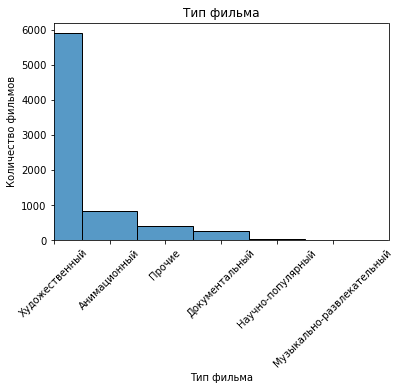

In [83]:
sns.histplot(data['type'], kde=False, bins=30)
plt.xlim(0,6)
plt.title('Тип фильма')
plt.xlabel('Тип фильма')
plt.xticks(rotation=45)
plt.ylabel('Количество фильмов')
plt.show()

В столбцах genres - жанр фильма, film_studio - студия-производитель, director - режиссёр, producer - продюсер, production_country - страна-производитель - многие параметры представлены списком, где через запятую перечислены несколько значений, что затрудняет их группировку и исследование.

In [84]:
data['genres'].value_counts()

драма                           476
комедия                         351
мелодрама,комедия               220
драма,мелодрама,комедия         189
драма,мелодрама                 183
                               ... 
мюзикл,мелодрама,фэнтези          1
документальный,новости,драма      1
семейный,детектив,детский         1
комедия,история,драма             1
мелодрама,история,драма           1
Name: genres, Length: 741, dtype: int64

In [85]:
len(data['genres'].unique())

742

In [86]:
data['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                       341
ООО "Мульт в кино"                                                                                           57
Анимаккорд Лтд                                                                                               23
ООО "Мульт в кино"                                                                                           18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                       16
                                                                                                           ... 
Мажестик Филмпродуцион, Айрис Продакшнз, Рат Пак Филмпродуцион, Фред Фильм                                    1
Арт Франс, Артлайн Филмз, Коэн Медиа Групп                                                                    1
Оккупант Интертейнмент                                                                                  

In [87]:
len(data['film_studio'].unique())

5483

In [88]:
data['director'].value_counts()

О.Семёнова               47
Стивен Содерберг         17
Д.Червяцов               17
Ридли Скотт              16
Тиль Швайгер             14
                         ..
Г.Куценко (Ю.Куценко)     1
Кент Джонс                1
Флориан Галленбергер      1
Афонсо Пойарт             1
И.Трусов                  1
Name: director, Length: 4794, dtype: int64

In [89]:
len(data['director'].unique())

4794

In [90]:
data['producer'].value_counts()

unknown                                                                                                                          564
П.Смирнов                                                                                                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                                                                     28
С.Сельянов                                                                                                                        18
Д.Ловейко, О.Кузовков                                                                                                             17
                                                                                                                                ... 
Люси Фишер, Пуйа Шахбазян, Дуглас Уик                                                                                              1
Т.Цыварева, В.Воля, Е.Головин, А.Сметанкин, А.Златопольский, С.Сельян

In [91]:
len(data['producer'].unique())

5328

In [92]:
data['production_country'].value_counts()

США                                                                    2171
Россия                                                                 1802
СССР                                                                    347
Франция                                                                 299
Великобритания                                                          253
                                                                       ... 
Швеция - США                                                              1
Франция - Германия - Турция - Катар                                       1
Франция-Китай                                                             1
Россия, Германия, Великобритания                                          1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: production_country, Length: 950, dtype: int64

In [93]:
len(data['production_country'].unique())

950

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [94]:
data['budget'].sum()

42240265939.0

In [95]:
data['refundable_support'].sum()

3939000000.0

In [96]:
data['non_refundable_support'].sum()

16261688312.0

Для более удобного формата переведем рублевые значения в млн.руб.

In [97]:
data['budget_mln']=round(data['budget']/1000000,2)

In [98]:
data['budget_mln'].describe()

count     332.00
mean      127.23
std       188.59
min         0.00
25%        42.00
50%        68.65
75%       141.98
max     2,305.07
Name: budget_mln, dtype: float64

In [99]:
data['budget_mln'].sum()

42240.24

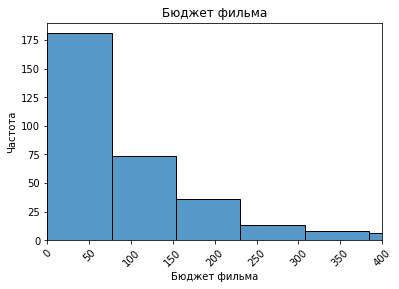

In [100]:
sns.histplot(data['budget_mln'], kde=False, bins=30)
plt.xlim(0,400)
plt.title('Бюджет фильма')
plt.xlabel('Бюджет фильма')
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.show()

In [101]:
data['refundable_support_mln']=round(data['refundable_support']/1000000,2)

In [102]:
data['refundable_support_mln'].sum()

3939.0

In [103]:
data['refundable_support_mln'].describe()

count   332.00
mean     11.86
std      24.92
min       0.00
25%       0.00
50%       0.00
75%      15.00
max     180.00
Name: refundable_support_mln, dtype: float64

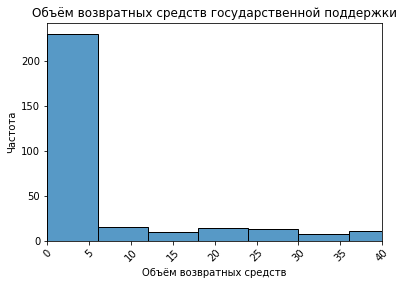

In [104]:
sns.histplot(data['refundable_support_mln'], kde=False, bins=30)
plt.xlim(0,40)
plt.title('Объём возвратных средств государственной поддержки')
plt.xlabel('Объём возвратных средств')
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.show()

In [105]:
data['non_refundable_support_mln']=round(data['non_refundable_support']/1000000,2)

In [106]:
data['non_refundable_support_mln'].describe()

count   332.00
mean     48.98
std      59.98
min       0.00
25%      25.00
50%      30.00
75%      40.38
max     400.00
Name: non_refundable_support_mln, dtype: float64

In [107]:
data['non_refundable_support_mln'].sum()

16261.680000000002

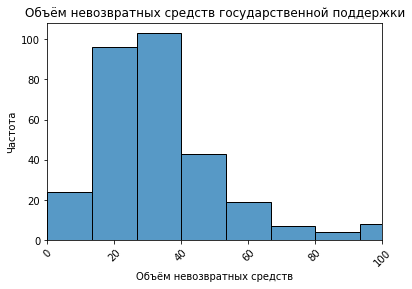

In [108]:
sns.histplot(data['non_refundable_support_mln'], kde=False, bins=30)
plt.xlim(0,100)
plt.title('Объём невозвратных средств государственной поддержки')
plt.xlabel('Объём невозвратных средств')
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.show()

In [109]:
data['box_office_mln']=round(data['box_office']/1000000,2)

In [110]:
data['box_office_mln'].describe()

count   3,155.00
mean       76.55
std       240.46
min         0.00
25%         0.09
50%         2.34
75%        24.00
max     3,073.57
Name: box_office_mln, dtype: float64

In [111]:
data['box_office_mln'].sum()

241518.99

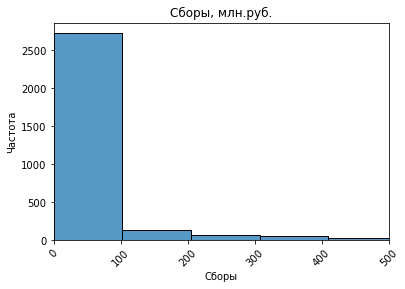

In [112]:
sns.histplot(data['box_office_mln'], kde=False, bins=30)
plt.xlim(0,500)
plt.title('Сборы, млн.руб.')
plt.xlabel('Сборы')
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.show()

Посмотрим данные столбцов non_refundable_support_mln, budget_mln, refundable_support_mln.

In [113]:
movies_data=data[['budget_mln','non_refundable_support_mln', 'refundable_support_mln']]
movies_data[movies_data.notna().any(axis=1)]

,budget_mln,non_refundable_support_mln,refundable_support_mln
1281,79.41,26.50,0.00
1448,37.14,26.00,0.00
1498,176.02,107.85,0.00
1524,40.57,28.00,0.00
1792,40.02,25.00,0.00
...,...,...,...
7464,980.00,400.00,100.00
7466,190.00,0.00,100.00
7474,944.00,400.00,100.00
7476,46.15,30.00,0.00


Часть значений в столбце budget- общий бюджет фильма равен 0, хотя в стобцах refundable_support_mln - объём возвратных средств государственной поддержки и non_refundable_support_mln - объём невозвратных средств государственной поддержки есть значения. 
В этом случае значения 0 в столбце budget -общий бюджет фильма - это ошибочной значение. Причиной мог послужить технический сбой. Выведем срез таких значений - их 17.

In [114]:
data[(data.budget_mln==0)&((data.refundable_support_mln >0)|(data.non_refundable_support_mln>0))]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,non_refundable_support,budget,financing_source,ratings,genres,box_office,budget_mln,refundable_support_mln,non_refundable_support_mln,box_office_mln
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",0.00,0.00,23.00,10.23
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00",0.00,0.00,75.00,446.16
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",0.00,10.00,70.00,196.57
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80",0.00,20.00,0.00,67.42
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",0.00,60.00,100.00,184.49
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51",0.00,0.00,59.00,1.96
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20",0.00,0.00,35.00,72.94
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",0.00,0.00,6.00,15.36
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00",0.00,19.00,51.00,70.30
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00",0.00,0.00,250.00,"1,038.32"


In [115]:
len(data[(data.budget_mln==0)&((data.refundable_support_mln >0)|(data.non_refundable_support_mln>0))])

17

In [116]:
round(17/len(data['budget_mln'])*100,2)

0.23

Если вывести строки с некорректными значениями в столбце budget -общий бюджет фильма на экран, то видим, что они не являются неявными дубликатами, они составляют 0.23% от числа фильмов с государственной поддержкой.

Решить вопрос с нулевыми значениями в столбце budget при наличии заполненной информации в столбце refundable_support или non_refundable_support, можно решить либо сложив значения столбцов refundable_support и non_refundable_support, либо удалив строки с нулевыми значениями. Учитывая, что данные в столбце budget не являются суммой значений столбцов refundable_support и non_refundable_support, и то, что они составляют только 0.2%, считаю правильным оставить только корректные существующие значения.

In [117]:
data.drop(data.index[data['budget_mln']==0],inplace=True)

In [118]:
data['budget_mln'].describe()

count     315.00
mean      134.10
std       191.23
min        14.46
25%        46.15
50%        73.38
75%       150.00
max     2,305.07
Name: budget_mln, dtype: float64

Осталось 315 значений с которыми будем проводить дальнейшее исследование.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [119]:
data['year']=data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [120]:
data['genres']=data['genres'].astype('str')
def genre_new(row, genre_index):
    array_genres=row['genres'].split(',')
    if len(array_genres)==0:
        return ''
    else:
        return array_genres[0]
    
data['genres_new']=data.apply(lambda row: genre_new(row,0),axis=1)

In [121]:
data['genres_new'].value_counts()

драма              1686
nan                 956
комедия             688
боевик              616
ужасы               573
мультфильм          532
триллер             520
фантастика          408
мелодрама           380
фэнтези             358
документальный      219
аниме                74
мюзикл               64
детектив             56
приключения          55
военный              46
криминал             39
биография            33
семейный             32
детский              27
история              26
короткометражка      12
концерт              10
спорт                 9
вестерн               7
музыка                7
для взрослых          3
фильм-нуар            1
реальное ТВ           1
Name: genres_new, dtype: int64

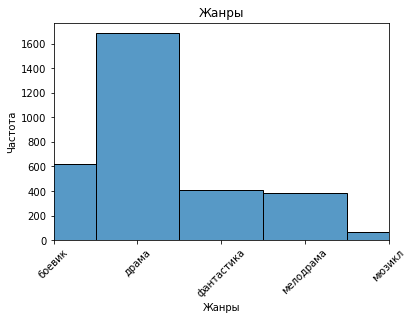

In [122]:
sns.histplot(data['genres_new'], kde=False, bins=30)
plt.xlim(0,4)
plt.title('Жанры')
plt.xlabel('Жанры')
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.show()

In [124]:
data['director']=data['director'].astype('str')
def director_new(row, director_index):
    array_director=row['director'].split(',')
    if len(array_director)==0:
        return ''
    else:
        return array_director[0]
    
data['director_new']=data.apply(lambda row: director_new(row,0),axis=1)

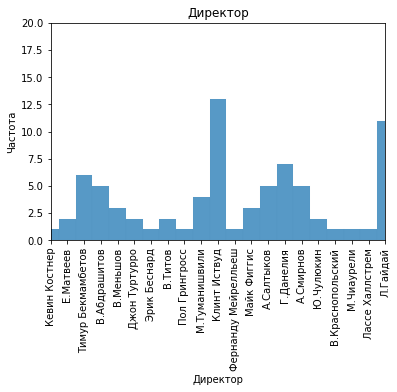

In [125]:
sns.histplot(data['director_new'], kde=False, bins=30)
plt.xlim(0,20)
plt.ylim(0,20)
plt.title('Директор')
plt.xlabel('Директор')
plt.xticks(rotation=90)
plt.ylabel('Частота')
plt.show()

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [126]:
round((data['refundable_support_mln'].sum()+data['non_refundable_support_mln'].sum())/data['budget_mln'].sum(),2)

0.45

Государственная поддержка составляет 45% от общего бюджета фильма.

****Выводы:****

**1.Cтудия-производитель:**
*В данных столбца с названием студии-производителя - film_studio было пропущено 18 или 0.2% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или необязательное поле для заполнения, а также мог иметь место технический сбой. Пропущенные значения с названием студии-производителя были удалены, так как невозможно восстановить корректные значения и количество пропущенных значений составляет 0.2%, их удаление не приведет к искажению результатов исследования.*

**2.Cтрана-производитель:**
*В данных столбца с названием страны-производителя - production_country было пропущено 1 или 0.0% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности, мог иметь место технический сбой. Пропущенные значения с названием страны-производителя были удалены, так как невозможно восстановить корректные значения и количество пропущенных значений составляет 0.0%, их удаление не приведет к искажению результатов исследования.*

**3.Режиссёр:**
*В данных столбца с именем режиссёра - director было пропущено 8 или 0.1% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности, возможно, необязательное поле для заполнения, а также мог иметь место технический сбой. Пропущенные значения с именем режиссёра были удалены, так как невозможно восстановить корректные значения и количество пропущенных значений составляет 0.1%, их удаление не приведет к искажению результатов исследования.*

**4.Продюсер:**
*В данных столбца с именем продюсера - producer было пропущено 564 или 7.6% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности, но, скорее всего, это необязательное поле для заполнения, а также мог иметь место технический сбой. Пропущенные значения с именем продюсера были заменены на значение 'unknown', так как невозможно восстановить корректные значения.*

**5.Объем возвратных средств государственной поддержки:**
*В данных столбца refundable_support -объём возвратных средств государственной поддержки было пропущено 7127 или 95.5% значений. Можно предположить, что заполнены значения только для тех фильмов, которые получили государственную поддержку. Пропущенные значения объёмов возвратных средств государственной поддержки оставлены незаполненными. Дальнейшие исследования для фильмов, получившим государственную поддержку, будут производиться с имеющимися заполненными данными.*

**6.Объем невозвратных средств государственной поддержки:**
*В данных столбца nun_refundable_support -объём невозвратных средств государственной поддержки было пропущено 7127 или 95.5% значений. Можно предположить, что заполнены значения только для тех фильмов, которые получили государственную поддержку. Пропущенные значения объёмов возвратных средств негосударственной поддержки оставлены незаполненными. Дальнейшие исследования для фильмов, получившим государственную поддержку, будут производиться с имеющимися заполненными данными.*

**7.Общий бюджет фильма:**
*В данных столбца budget -общий бюджет фильма было пропущено 7127 или 95.5% значений. Можно предположить, что заполнены значения только для тех фильмов, которые получили государственную поддержку. Пропущенные значения общего бюджета фильма оставлены незаполненными. Дальнейшие исследования для фильмов, получившим государственную поддержку, будут производиться с имеющимися заполненными данными.*

**8.Источник государственного финансирования:**
*В данных столбца financing_source -источник государственного финансирования было пропущено 7127 или 95.5% значений. Можно предположить, что заполнены значения только для тех фильмов, которые получили государственную поддержку. Пропущенные значения источников государственного финансирования оставлены незаполненными. Дальнейшие исследования для фильмов, получившим государственную поддержку, будут производиться с имеющимися заполненными данными.*

**9.Рейтинг фильма на КиноПоиске:**
*В данных столбца ratings -рейтинг фильма на КиноПоиске было пропущено 948 или 12.7 % значений. Можно предположить, имел место человеческий фактор - не все данные заполнялись, либо данная информация была необязательна для заполнения, возможно, технический сбой. Часть заполненных данных отображалась некорректно. Пропущенные значения рейтинга фильма на КиноПоиске оставлены незаполненными, так как невозможно заменить корректными значениями.*

**10.Жанр фильма:**
*В данных столбца genres -жанр фильма было пропущено 957 или 12.8 % значений. Можно предположить, имел место человеческий фактор - не все данные заполнялись, либо данная информация была необязательна для заполнения, возможно, технический сбой. Пропущенные значения жанра фильма не заполнялись, так как нет возможности заполнить корректными значениями.*

**11.Дата премьеры фильма:**
*Методом datetime() превращаем в понятные для Python даты из типа object в тип datetime в столбце show_start_date -дата премьеры фильма.*

**12.Название фильма:**
*Всего 1270 строк, где в столбце title название фильма встречается более одного раза. В то же время во всех случаях номер прокатного удостоверения и дата премьеры фильма - это разные значения. Один фильм может иметь несколько прокатных удостоверений в случае, если они выдавались в разнае сроки и для разных прокатных целей. Также фильм мог поменять правообладателя или даже быть немного изменендля каких-либо творческих или коммерческих целей - с документальной точки зрения это требует выдачи новой "прокатки". Данные столбца оставляю без изменений.*

**13.Тип фильма:**
*В столбеце type - тип фильма, скорректированы проблемные значения.*

**14.Номер прокатного удостоверения:**
*Выявлено 2 повторяющиеся в столбце pu_number - номер прокатного удостоверения -221154310 и 221054410. При этом фильм с номером 221054410 - "Анализируй это!" и "Анализируй то!", скорее всего один и тот же фильм, который дважды внесен в базу данных по ошибке, так как основная информация дублируется -это неявный дубликат. Фильм с номером прокатного удостоверения 221154310 - "Как жениться и остаться холостым" и "Иоанна - женщина на папском престоле /По роман...", скорее всего два разных фильма, так как информация в названиии фильма, студии-производителе, директоре, режиссере, стране-производителе различается. Скорее всего здесь здесь допущена ошибка при внесении номера прокатного удостоверения или произошла техническая ошибка. Оба повторяющихся значения с номером прокатного удостоверения удаляю, так как номер прокатного удостоверения - это уникальные значения, которые не должны повторяться.*

*В столбцах genres - жанр фильма, film_studio - студия-производитель, director - режиссёр, producer - продюсер, production_country - страна-производитель - многие параметры представлены списком, где через запятую перечислены несколько значений, что затрудняет их группировку и исследование. Поэтому созданы два новых столбца: с именем и фамилией главного режиссёра director_new и основным жанром фильма -genres_new. В столбцы вошли первые значения из списка режиссёров и жанров соответственно.*

*Создан столбец с информацией о годе проката, в котором год выделен из даты премьеры фильма.*

*Часть значений в столбце budget- общий бюджет фильма равен 0, хотя в стобцах refundable_support_mln - объём возвратных средств государственной поддержки и non_refundable_support_mln - объём невозвратных средств государственной поддержки есть значения - 17 значений или 0.23% от числа фильмов с государственной поддержкой, их удалили, т.к. нет возможности заменить на корректное значение. Для дальнейшего исследования осталось 315 значений.*

*Посчитана, какую долю от общего бюджета фильма составляет государственная поддержка - 45%.*

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Рассмотрим количество выходов фильмов в прокат по годам.

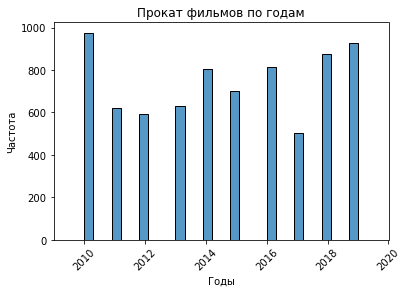

In [127]:
sns.histplot(data['year'], kde=False, bins=30)
plt.xlim(2009,2020)
plt.title('Прокат фильмов по годам')
plt.xlabel('Годы')
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.show()

In [128]:
data.groupby('year')['title'].count().sort_values(ascending=False).head(10)

year
2010    976
2019    925
2018    875
2016    814
2014    805
2015    699
2013    629
2011    620
2012    592
2017    503
Name: title, dtype: int64

 Посчитаем долю, которую составляют фильмы с указанной информацией о прокате в кинотеатрах от общего числа фильмов.

In [129]:
round(data['box_office_mln'].count()/data['title'].count(),2)

0.42

Больше всего фильмов было выпущено в прокат в 2010 году - 980, а в 2018-2019 годах, 926 и 879 фильмов соответственно. Меньше всего фильмов за анализируемый период было выпущено прокат в 2017 году - 505.

Имеющаяся у нас информация о сборах от проката фильмов охватывает не все фильмы. Доля, которую составляют фильмы с указанием информации по сборам составляет 42% от общего числа фильмов.

In [130]:
data['title'].count()

7438

In [131]:
year_box_office = pd.DataFrame()
year_box_office['sum_year_box_office'] = data.groupby('year')['box_office_mln'].sum()
year_box_office['count_year_box_office'] = data.groupby('year')['box_office_mln'].count()
year_box_office['percent_box_office'] = year_box_office['count_year_box_office'] / data['title'].count()
year_box_office['total_year']=data.groupby('year')['title'].count()
year_box_office['percent_year_total']=year_box_office['count_year_box_office']/year_box_office['total_year']
year_box_office.sort_values('percent_box_office', ascending = False)

,sum_year_box_office,count_year_box_office,percent_box_office,total_year,percent_year_total
year,,,,,
2019,"48,278.14",529,0.07,925,0.57
2016,"46,742.17",522,0.07,814,0.64
2018,"49,251.94",470,0.06,875,0.54
2015,"38,527.71",459,0.06,699,0.66
2017,"48,458.17",355,0.05,503,0.71
2014,"7,434.59",278,0.04,805,0.35
2013,29.68,184,0.02,629,0.29
2012,6.86,127,0.02,592,0.21
2011,14.04,109,0.01,620,0.18


Доля фильмов с указанием информации по сборам менялась в зависимости от года выпуска фильма в прокат. 

На 2010 - 2013 годы приходится наименьшее количество фильмов, по которым была предоставлена информация по сборам. Так, информация по сборам в 2010 году имеется только в 1% фильмов к общему количеству фильмов за весь рассматриваемый период (105 к 7438) или 11%  от 976 фильмов, вышедших в прокат в 2010 году. В 2011 году - 1% (109 к 7438) или 18% от 620 фильмов, вышедших в 2011 году.

На 2015 - 2019 годы приходится наибольшее количество фильмов, по которым была предоставлена информация по сборам. В 2019 году имеется больше всего информации по сборам от проката - 7% фильмов к общему количеству фильмов за весь рааматриваемый период с 2010 по 2019 годы (529 к 7438) или 57% от 925 фильмам, вышедших в прока в 2019 году. В 2016 году 7% и 64% соответственно.

2019 год наболее всех остальных периодов предоставлен в данных.

После острых нулевых, в начале десятых годов ситуация с российским кинопрокатом начинает стабилизироваться - произошли большие изменения к киноиндустрии -"пленка" уходит в прошлое, приходит "цифра", что дает возможность увеличить число копий фильмов, выпущенных в прокат, соответственно и рост сборов от проката в 2011 году. В 2013 году произошел первый прорыв по сборам - в прокате начали появляться первые фильмы-миллиардники. В 2012 году вступил в силу ФЗ "О защите детей от информации, причиняющей вред их здоровью и развитию", в частности, приведший к введению новой возрастной классификации, близкая к международной классификации (МРАА). В 2015 году Министерством культуры совместно с Фондом кино был запущен сервис, который позволяет получать информацию о показах фильмов, идущих в прокате в кинозалах - отсыда наиболее полная информация по сборам от проката за период 2015-2019 годы.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

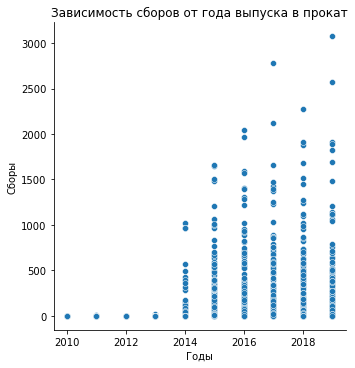

In [132]:
sns.relplot(x='year', y='box_office_mln', data=data)
total_area=np.linspace(0,300)
plt.title('Зависимость сборов от года выпуска в прокат')
plt.xlabel('Годы')
plt.ylabel('Сборы')
plt.show()

In [133]:
data.groupby('year')['box_office_mln'].sum().sort_values(ascending=False).head()

year
2018   49,251.94
2017   48,458.17
2019   48,278.14
2016   46,742.17
2015   38,527.71
Name: box_office_mln, dtype: float64

Самые большие сборы от кинопроката наблюдаются в 2017-2019 годах. В 2018 - 49688.35, 2017 - 48563.73, 2019 - 48435.75.

In [134]:
data.groupby('year')['box_office_mln'].sum().sort_values().head()

year
2010       2.36
2012       6.86
2011      14.04
2013      29.68
2014   7,434.59
Name: box_office_mln, dtype: float64

Наименьшее количество сборов от кинопроката в 2010 году - 2.36.

Выведем описание значений столбца.

In [135]:
data['box_office_mln'].describe()

count   3,138.00
mean       76.08
std       240.35
min         0.00
25%         0.08
50%         2.31
75%        23.46
max     3,073.57
Name: box_office_mln, dtype: float64

Обращает на себя внимание значение min = 0. Посмотрим на срез данных.

In [136]:
data[(data.box_office_mln==0)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,budget_mln,refundable_support_mln,non_refundable_support_mln,box_office_mln,year,genres_new,director_new
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,NaN,...,8.30,"мелодрама,комедия","2,700.00",NaN,NaN,NaN,0.00,2013,мелодрама,В.Меньшов
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,unknown,«6+» - для детей старше 6 лет,NaN,...,8.00,"мелодрама,комедия",360.00,NaN,NaN,NaN,0.00,2016,мелодрама,Ю.Чулюкин
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",unknown,«6+» - для детей старше 6 лет,NaN,...,7.70,драма,420.00,NaN,NaN,NaN,0.00,2016,драма,В.Краснопольский
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown,«6+» - для детей старше 6 лет,NaN,...,8.70,"комедия,мелодрама,криминал",380.00,NaN,NaN,NaN,0.00,2013,комедия,Л.Гайдай
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,unknown,«6+» - для детей старше 6 лет,NaN,...,8.10,драма,"1,165.00",NaN,NaN,NaN,0.00,2013,драма,И.Бабич
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,Моя безумная семья,111010011,2011-12-21 12:00:00+00:00,Художественный,"ООО ""Фокс Интернэшнл Продакшнс СНГ"", НП ""Интер...",Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский",«12+» - для детей старше 12 лет,NaN,...,5.60,комедия,"4,578.00",NaN,NaN,NaN,0.00,2011,комедия,Р.Давлетьяров
5343,Хранитель времени 3D,121023411,2011-12-15 12:00:00+00:00,Художественный,"ДжиКей Филмз, Инфинитум Найхл",США,Мартин Скорсезе,"Джонни Депп, Тим Хэдингтон, Грэм Кинг, Мартин ...",«12+» - для детей старше 12 лет,NaN,...,6.90,"драма,детектив,приключения",750.00,NaN,NaN,NaN,0.00,2011,драма,Мартин Скорсезе
5360,Резня /По пьесе Ясмины Резы/,121022511,2011-11-29 12:00:00+00:00,Художественный,"Эс Би Эс Продакшнз, Константин Филм, Эс Пи Ай ...",Германия - Франция - Польша,Роман Полански,"Оливер Бербен, Мартин Московиц, Саид Бен Саид",«16+» - для детей старше 16 лет,NaN,...,7.40,"драма,комедия","2,000.00",NaN,NaN,NaN,0.00,2011,драма,Роман Полански
5388,ВОИН.com,111004411,2011-07-04 12:00:00+00:00,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",«12+» - для детей старше 12 лет,NaN,...,4.70,комедия,465.00,NaN,NaN,NaN,0.00,2011,комедия,Е.Бычкова


In [137]:
len(data[(data.box_office_mln==0)])

455

In [138]:
round(len(data[(data.box_office_mln==0)])/len(data['box_office_mln'])*100,2)

6.12

In [139]:
data[(data.box_office_mln==0)]['box_office'].sum()

646892.4

In [140]:
round(data[(data.box_office_mln==0)]['box_office'].sum()/data['box_office'].sum()*100,4)

0.0003

В некоторых данных по сборам, приокруглении до млн.руб., составляют менее 1 млн. Таких значений 455 или 6.1% от количества, по которым есть информация и  сумма сборов по ним составляет 646892.4 руб. или менее 1% от общей суммы сборов.

Посмотрим какие это значения.

In [141]:
data[(data.box_office_mln==0)]['box_office'].min()

0.0

In [142]:
data[(data.box_office==0)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,budget_mln,refundable_support_mln,non_refundable_support_mln,box_office_mln,year,genres_new,director_new
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,unknown,«6+» - для детей старше 6 лет,NaN,...,7.70,"драма,биография,музыка",0.00,NaN,NaN,NaN,0.00,2013,драма,Эмиль Лотяну
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,unknown,«12+» - для детей старше 12 лет,NaN,...,8.20,драма,0.00,NaN,NaN,NaN,0.00,2013,драма,Н.Губенко
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,...,6.30,комедия,0.00,NaN,NaN,NaN,0.00,2012,комедия,А.Магомедов
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,...,6.50,"драма,военный,история",0.00,NaN,NaN,NaN,0.00,2012,драма,Сергей Лозница
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,...,7.40,"аниме,мультфильм,драма",0.00,NaN,NaN,NaN,0.00,2012,аниме,Окиура Хироюки
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,...,7.70,"аниме,мультфильм,фантастика",0.00,NaN,NaN,NaN,0.00,2012,аниме,Мамору Хосода
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,...,7.90,биография,0.00,NaN,NaN,NaN,0.00,2013,биография,Грач Кешишян
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,...,5.50,"комедия,мелодрама",0.00,NaN,NaN,NaN,0.00,2012,комедия,К.Оганесян
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,...,5.80,"мелодрама,комедия,драма",0.00,NaN,NaN,NaN,0.00,2013,мелодрама,Пол Вайц
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,...,6.90,драма,0.00,NaN,NaN,NaN,0.00,2014,драма,Сандра Неттельбек


In [143]:
data[(data.box_office_mln==0)]['box_office'].max()

5000.0

В данных по сборам, округленных до 1 млн.руб., имеющим значение 0, минимальные сборы составляют 0, максимальные -5000 руб, т.е. нет искажения данных при округлении.

Text(0.5, 0, 'Сборы')

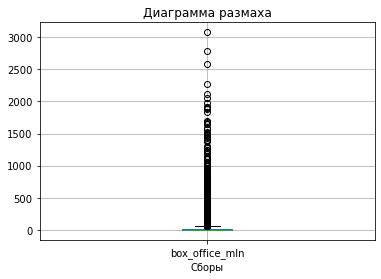

In [144]:
data.boxplot('box_office_mln')
plt.title('Диаграмма размаха')
plt.xlabel('Сборы')

<AxesSubplot:xlabel='year'>

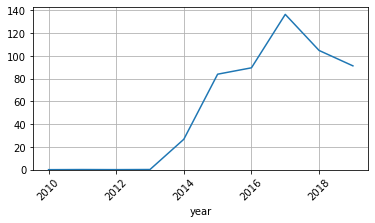

In [145]:
data.groupby(['year'])['box_office_mln'].mean().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

На графиках видим большие изменения сборов от проката в зависимости от года выхода фильма в прокат. В 2010-2013 - самые низкие сборы за весь рассматриваемый период. По всей видимости ощущались последствия экономического кризиса 2008 года. В 2014 году -другой кризис, уже внутри страны. С 2014 года наблюдается рост сборов от проката, который достиг пика в 2017 году. 

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [146]:
data.groupby('year').agg({'box_office_mln': ['count','mean','median']})
data.pivot_table(columns='year',values='box_office_mln',aggfunc=('count','mean','median'))

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,105.00,109.00,127.00,184.00,278.00,459.00,522.00,355.00,470.00,529.00
mean,0.02,0.13,0.05,0.16,26.74,83.94,89.54,136.50,104.79,91.26
median,0.00,0.00,0.01,0.00,0.02,4.78,3.78,9.92,8.82,4.60


Наиболее полно данными представлен период 2015 - 2019 г. 

В 2013 году произошел первый прорыв по сборам - в прокате начали появляться первые фильмы-миллиардники, с развитием киноиндустрии их количество росло, отсюда наблюдается большая разница между средним по сборам от проката и медианой.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Рассмотрим параметр age_restriction -возрастная категория.

In [147]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Существует 5 групп, делящиеся по возрастным ограничениям аудитории - «18+» - запрещено для детей, «6+» - для детей старше 6 лет, «12+» - для детей старше 12 лет, «16+» - для детей старше 16 лет, «0+» - для любой зрительской аудитории'.

In [148]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2837
«18+» - запрещено для детей               1600
«12+» - для детей старше 12 лет           1581
«0+» - для любой зрительской аудитории     803
«6+» - для детей старше 6 лет              617
Name: age_restriction, dtype: int64

Наибольшее количество фильмов относится к категории "16+" - 2848, наименьшее - к категории "6+" - 623.

Нас интересует период с 2015 по 2019 годы. Для анализа создадим новый датафрейм, ограниченный данным временным периодом.

In [149]:
data_year=data[(data.year>=2015)]

In [150]:
data_year['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           1164
«18+» - запрещено для детей               1081
«12+» - для детей старше 12 лет            779
«6+» - для детей старше 6 лет              476
«0+» - для любой зрительской аудитории     316
Name: age_restriction, dtype: int64

В период с 2015-2019 наибольшее количество фильмов относится к категории "16+" - 1170, наименьшее - к категории "0+" - 316. Заметно значительное снижение фильмов для категории "0+", относительно фильмов других возрастных категорий.

In [151]:
age_pivot=data_year.pivot_table(index=['year','age_restriction'], values='box_office_mln',aggfunc=['count','median','mean', 'sum'])
age_pivot.columns=['count','median','mean', 'sum']
age_pivot.sort_values('sum',ascending=False).head(20)

count  median   mean       sum
year age_restriction                                                
2017 «16+» - для детей старше 16 лет    120    9.64 155.79 18,694.57
2016 «16+» - для детей старше 16 лет    181    5.09  91.68 16,594.30
2018 «16+» - для детей старше 16 лет    155    8.75 105.02 16,278.42
     «12+» - для детей старше 12 лет     66   10.04 216.17 14,267.27
2015 «12+» - для детей старше 12 лет     72   15.14 186.38 13,419.48
2019 «16+» - для детей старше 16 лет    178    3.21  71.65 12,753.42
     «6+» - для детей старше 6 лет       80   12.53 158.81 12,704.95
     «12+» - для детей старше 12 лет     85    3.41 149.18 12,680.19
2016 «6+» - для детей старше 6 лет       70    3.03 172.19 12,053.16
2017 «6+» - для детей старше 6 лет       44   50.28 273.43 12,031.04
2016 «12+» - для детей старше 12 лет     80    4.23 139.38 11,150.78
2015 «16+» - для детей старше 16 лет    165    4.32  65.34 10,781.57
2019 «18+» - запрещено для детей        183    5.60  55.31 10,121.83
2018 «6+» - для детей старше 6 лет       65   14.46 152.52  9,913.76
2017 «18+» - запрещено для детей        147    8.21  65.66  9,651.52
2018 «18+» - запрещено для детей        179    7.18  48.94  8,760.04
2015 «6+» - для детей старше 6 лет       52   19.52 163.79  8,517.28
2017 «12+» - для детей старше 12 лет     41    9.01 191.50  7,851.44
2016 «18+» - запрещено для детей        151    6.11  44.99  6,793.93
2015 «18+» - запрещено для детей        131    4.65  41.45  5,430.33

Наибольшие сборы в 2016-2019 годах собрали фильмы возрастной категории "16+" (2016 - 16664.60, 2017 - 18945.02, 2018 - 16503.62)

In [152]:
age_pivot=data_year.pivot_table(index=['year','age_restriction'], values='box_office_mln',aggfunc=['count','median','mean', 'sum'])
age_pivot.columns=['count','median','mean', 'sum']
age_pivot.sort_values('sum').head(10)

count  median   mean      sum
year age_restriction                                                      
2019 «0+» - для любой зрительской аудитории      3    3.89   5.92    17.75
2018 «0+» - для любой зрительской аудитории      5    3.62   6.49    32.45
2016 «0+» - для любой зрительской аудитории     40    2.68   3.75   150.00
2017 «0+» - для любой зрительской аудитории      3   22.18  76.53   229.60
2015 «0+» - для любой зрительской аудитории     39    2.94   9.72   379.05
     «18+» - запрещено для детей               131    4.65  41.45 5,430.33
2016 «18+» - запрещено для детей               151    6.11  44.99 6,793.93
2017 «12+» - для детей старше 12 лет            41    9.01 191.50 7,851.44
2015 «6+» - для детей старше 6 лет              52   19.52 163.79 8,517.28
2018 «18+» - запрещено для детей               179    7.18  48.94 8,760.04

Наименьшее количество сборов у фильмов с возрастной категорией "0+". Во все исследуемые годы с 2015-2019 данная тенденция сохраняется. Скорее всего речь идет о мультфильмах и детских фильмах, идущих в утреннее и дневное время, билеты на которые продаются по более низким ценам.

In [153]:
age_pivot=data_year.pivot_table(index=['age_restriction','year'], values='box_office_mln',aggfunc=['count','median','mean', 'sum'])
age_pivot.columns=['count','median','mean', 'sum']
age_pivot.sort_values('count',ascending=False).head(20)

count  median   mean       sum
age_restriction                 year                                
«18+» - запрещено для детей     2019    183    5.60  55.31 10,121.83
«16+» - для детей старше 16 лет 2016    181    5.09  91.68 16,594.30
«18+» - запрещено для детей     2018    179    7.18  48.94  8,760.04
«16+» - для детей старше 16 лет 2019    178    3.21  71.65 12,753.42
                                2015    165    4.32  65.34 10,781.57
                                2018    155    8.75 105.02 16,278.42
«18+» - запрещено для детей     2016    151    6.11  44.99  6,793.93
                                2017    147    8.21  65.66  9,651.52
                                2015    131    4.65  41.45  5,430.33
«16+» - для детей старше 16 лет 2017    120    9.64 155.79 18,694.57
«12+» - для детей старше 12 лет 2019     85    3.41 149.18 12,680.19
«6+» - для детей старше 6 лет   2019     80   12.53 158.81 12,704.95
«12+» - для детей старше 12 лет 2016     80    4.23 139.38 11,150.78
                                2015     72   15.14 186.38 13,419.48
«6+» - для детей старше 6 лет   2016     70    3.03 172.19 12,053.16
«12+» - для детей старше 12 лет 2018     66   10.04 216.17 14,267.27
«6+» - для детей старше 6 лет   2018     65   14.46 152.52  9,913.76
                                2015     52   19.52 163.79  8,517.28
                                2017     44   50.28 273.43 12,031.04
«12+» - для детей старше 12 лет 2017     41    9.01 191.50  7,851.44

In [154]:
age_pivot=data_year.pivot_table(index=['age_restriction','year'], values='box_office_mln',aggfunc=['count','median','mean', 'sum'])
age_pivot.columns=['count','median','mean', 'sum']
age_pivot.sort_values('count').head(20)

count  median   mean       sum
age_restriction                        year                                
«0+» - для любой зрительской аудитории 2017      3   22.18  76.53    229.60
                                       2019      3    3.89   5.92     17.75
                                       2018      5    3.62   6.49     32.45
                                       2015     39    2.94   9.72    379.05
                                       2016     40    2.68   3.75    150.00
«12+» - для детей старше 12 лет        2017     41    9.01 191.50  7,851.44
«6+» - для детей старше 6 лет          2017     44   50.28 273.43 12,031.04
                                       2015     52   19.52 163.79  8,517.28
                                       2018     65   14.46 152.52  9,913.76
«12+» - для детей старше 12 лет        2018     66   10.04 216.17 14,267.27
«6+» - для детей старше 6 лет          2016     70    3.03 172.19 12,053.16
«12+» - для детей старше 12 лет        2015     72   15.14 186.38 13,419.48
«6+» - для детей старше 6 лет          2019     80   12.53 158.81 12,704.95
«12+» - для детей старше 12 лет        2016     80    4.23 139.38 11,150.78
                                       2019     85    3.41 149.18 12,680.19
«16+» - для детей старше 16 лет        2017    120    9.64 155.79 18,694.57
«18+» - запрещено для детей            2015    131    4.65  41.45  5,430.33
                                       2017    147    8.21  65.66  9,651.52
                                       2016    151    6.11  44.99  6,793.93
«16+» - для детей старше 16 лет        2018    155    8.75 105.02 16,278.42

Количество фильмов, выпускаемых в прокат для категории "0+" в период 2017-2019 г значительно снизилось (2015-39, 2016-40, 2017-3, 2018-5, 2019-3.

Наибольшее количество фильмов, выпускаемых в прокат - для категорий "16+" и "18+".

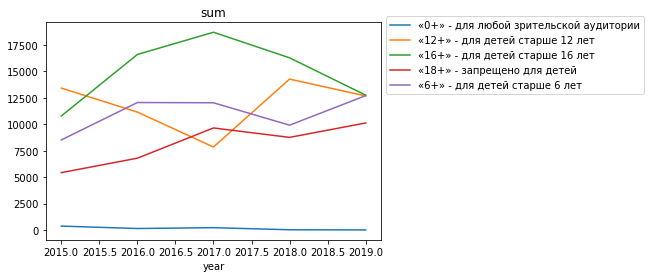

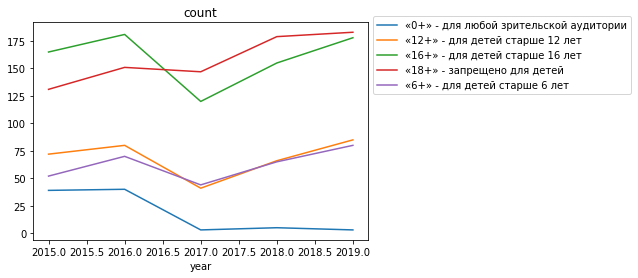

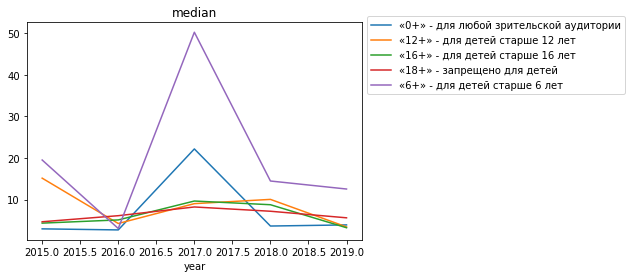

In [155]:
for aggfunc in ['sum','count','median']: 
    ax=(
        data_year
        .pivot_table(index='year',columns='age_restriction',values='box_office_mln',aggfunc=aggfunc)
        .plot(title=aggfunc)
    )
    ax.legend(bbox_to_anchor=(1, 1.05))
    plt.show()  

****Выводы:****

**Проведен исследовательский анализ данных:**

**1.Количество фильмов, выходящих в прокат по годам:**
*Наибольшее количество фильмов вышло в прокат в 2010 году - 980, 2019 - 926, 2018 - 879, 2016 - 817, 2014 - 806, 2015 - 705, 2013 - 629, 2011 - 620, 2012 - 592 и 2017 - 505. Больше всего фильмов было выпущено в прокат в 2010 году - 980, а в 2018-2019 годах, 926 и 879 фильмов соответственно. Меньше всего фильмов за анализируемый период было выпущено прокат в 2017 году - 505.
Имеющаяся у нас информация о сборах от проката фильмов охватывает не все фильмы. Доля, которую составляют фильмы с указанием информации по сборам составляет 42% от общего числа фильмов. *

*Доля фильмов с указанием информации по сборам менялась в зависимости от года выпуска фильма в прокат.На 2010 - 2013 годы приходится наименьшее количество фильмов, по которым была предоставлена информация по сборам. Так, информация по сборам в 2010 году имеется только в 1% фильмов к общему количеству фильмов за весь рассматриваемый период (105 к 7438) или 11% от 976 фильмов, вышедших в прокат в 2010 году. В 2011 году - 1% (109 к 7438) или 18% от 620 фильмов, вышедших в 2011 году.*

*На 2015 - 2019 годы приходится наибольшее количество фильмов, по которым была предоставлена информация по сборам. В 2019 году имеется больше всего информации по сборам от проката - 7% фильмов к общему количеству фильмов за весь рааматриваемый период с 2010 по 2019 годы (529 к 7438) или 57% от 925 фильмам, вышедших в прока в 2019 году. В 2016 году 7% и 64% соответственно.2019 год наболее всех остальных периодов предоставлен в данных.*

*В начале десятых годов произошли большие изменения к киноиндустрии -"пленка" уходит в прошлое, приходит "цифра", что дает возможность увеличить число копий фильмов, выпущенных в прокат, соответственно и рост сборов от проката в 2011 году. В 2013 году произошел первый прорыв по сборам - в прокате начали появляться первые фильмы-миллиардники. В 2012 году вступил в силу ФЗ "О защите детей от информации, причиняющей вред их здоровью и развитию", в частности, приведший к введению новой возрастной классификации, близкая к международной классификации (МРАА). В 2015 году Министерством культуры совместно с Фондом кино был запущен сервис, который позволяет получать информацию о показах фильмов, идущих в прокате в кинозалах - отсыда наиболее полная информация по сборам от проката за период 2015-2019 годы.*

**2.Сумма сборов в зависимости от динамики проката по годам:**
*Самые большие сборы от кинопроката наблюдаются в 2017-2019 годах. В 2018 - 49688.35, 2017 - 48563.73, 2019 - 48435.75. Наименьшее количество сборов от кинопроката в 2010 году - 2.36. В некоторых данных по сборам, приокруглении до млн.руб., составляют менее 1 млн. Таких значений 455 или 6.1% от количества, по которым есть информация и сумма сборов по ним составляет 646892.4 руб. или менее 1% от общей суммы сборов. Наблюдаются большие изменения сборов от проката в зависимости от года выхода фильма в прокат. В 2010-2013 - самые низкие сборы за весь рассматриваемый период. По всей видимости ощущались последствия экономического кризиса 2008 года. В 2014 году -другой кризис, уже внутри страны. С 2014 года наблюдается рост сборов от проката, который достиг пика в 2017 году. Наиболее полно данными представлен период 2015 - 2019 г.*




**3.Влияние возрастных ограничений аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год:**
*Наибольшее количество фильмов относится к категории "16+" - 2848, наименьшее - к категории "6+" - 623. В период с 2015-2019 наибольшее количество фильмов относится к категории "16+" - 1170, наименьшее - к категории "0+" - 316. Заметно значительное снижение фильмов для категории "0+", относительно фильмов других возрастных категорий. Наибольшие сборы в 2016-2019 годах собрали фильмы возрастной категории "16+" (2016 - 16664.60, 2017 - 18945.02, 2018 - 16503.62). Наименьшее количество сборов у фильмов с возрастной категорией "0+". Во все исследуемые годы с 2015-2019 данная тенденция сохраняется. Скорее всего речь идет о мультфильмах и детских фильмах, идущих в утреннее и дневное время, билеты на которые продаются по более низким ценам. Количество фильмов, выпускаемых в прокат для категории "0+" в период 2017-2019 г значительно снизилось (2015-39, 2016-40, 2017-3, 2018-5, 2019-3. Наибольшее количество фильмов, выпускаемых в прокат - для категорий "16+" и "18+". В среднем успешнее фильмы в категориях 6+ и 0+ (по медиане)*


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [156]:
data['support_total']=data['refundable_support_mln']+data['non_refundable_support_mln']

In [157]:
data['support_ratio']=round(data['support_total']/data['budget_mln'],2)

In [158]:
data['budget_payback']=round(data['box_office_mln']/data['budget_mln'],2)

In [159]:
data['support_payback']=round(data['box_office_mln']/data['support_total'],2)

Исследуем датафрейм, в который включает в себя данные только по фильмам, которые получили государственную поддержку.

In [160]:
data_bud=data[(data.budget_mln>0)&((data.refundable_support_mln >0)|(data.non_refundable_support_mln>0))]

Посмотрим какие типы фильмов получили государственную поддержку.

In [161]:
budget_pivot=data_bud.pivot_table(index='type', values=['budget_mln','refundable_support_mln', 'non_refundable_support_mln',
                                                        'box_office_mln','ratings'],aggfunc=('sum', 'mean','count'))
budget_pivot.head()

box_office_mln                  budget_mln                   \
                        count   mean       sum      count   mean       sum   
type                                                                         
Анимационный               24 210.20  5,044.89         25 209.62  5,240.46   
Документальный              0    NaN      0.00          1  33.00     33.00   
Художественный            277 123.81 34,295.32        289 127.91 36,966.78   

               non_refundable_support_mln                 ratings       \
                                    count  mean       sum   count mean   
type                                                                     
Анимационный                           25 46.46  1,161.52      25 5.85   
Документальный                          1  3.00      3.00       1 8.00   
Художественный                        289 48.41 13,989.19     274 6.05   

                        refundable_support_mln                 
                    sum                  count  mean      sum  
type                                                           
Анимационный     146.30                     25 29.60   740.00  
Документальный     8.00                      1  0.00     0.00  
Художественный 1,656.70                    289 10.09 2,915.00

Государственную поддержку за исследуемый период получили:

-289 художественных фильма в размере 16904.19 (13989.19 из которых составляют невозвратные средства государственной поддержки - non_refundable_support_mln и 2915.0 -возвратные средства государственной поддержки - refundable_support_mln) или 45.7% от  budget_mln - общего бюджета художественных фильмов 36966.78; 
-25 анимационных фильмов в размере 1901.52 (1161.52 -невозвратные средства, 740.0 - возвратные) -36.2% от общего бюджета анимационных фильмов 5240.46;

-1 документальный фильм в размере 3.0 (3.0 -невозвратные средства, 0 -возвратные) -9% от бюджета документального фильма 33.0.

Сборы составили:

-34295.32 от показа художественных фильмов, что составляет 92.8% к общему бюджету художественных фильмов 36966.78;
-5044.89 от показа анимационных фильмов или 96.3% к общему бюджету анимационных фильмов 5240.46;
-сборы от показа документального фильма - 0 при общем бюджете фильма 33.0.


In [162]:
round(data_bud['box_office_mln'].sum()/data_bud['budget_mln'].sum(),2)

0.93

Средняя окупаемость фильмов составляет 93% от общего бюджета фильмов.

In [163]:
round(data_bud['box_office_mln'].sum()/(data_bud['support_total'].sum()),2)

2.09

Окупаемость средств государственной поддержки составляет 209%.

In [164]:
budget_pivot=data_bud.pivot_table(index='year', values=['support_ratio','support_total', 'budget_payback',
                                                        'support_payback', 'budget_mln','ratings'],aggfunc=('mean','count'))
budget_pivot.head(10)

budget_mln        budget_payback      ratings      support_payback       \
          count   mean          count mean   count mean           count mean   
year                                                                           
2013          2 127.72              2 0.06       2 6.70               2 0.10   
2014         15  85.30             15 0.63      14 5.96              15 1.64   
2015         80  91.37             79 0.48      77 6.14              79 1.27   
2016         58 124.64             57 0.60      54 5.69              57 1.21   
2017         39 178.77             37 1.02      37 6.05              37 3.16   
2018         52 127.92             52 1.13      50 6.04              52 2.43   
2019         69 181.78             59 0.88      66 6.18              59 2.15   

     support_ratio      support_total        
             count mean         count  mean  
year                                         
2013             2 0.47             2 67.17  
2014            15 0.52            15 36.60  
2015            80 0.53            80 40.34  
2016            58 0.55            58 68.57  
2017            39 0.48            39 79.46  
2018            52 0.51            52 59.58  
2019            69 0.50            69 68.46

По годам доля государственной поддержки к общему бюджету фильмов находится примерно на одном уровне - 47-55%. Окупаемость от общего бюджета фильмов менялась по годам -наблюдается рост в 2014-2016 относительно 2013 года, наибольшего пика достигнув в 2017-2018 годах, со снижением в 2019 году. Фильмы с датой премьеры в 2019 году, особенно, если премьера пришлась на конец года, основную часть сборов скорее всего могут получить в 2020 году, по которому у нас нет информации. Кроме того, в 2020 году началась пандемия короновируса, что привело к закрытию и ограничению работы кинотеатров и снижению сборов. По окупаемости средств государственной поддержки динамика по годам схожа с динамикой окупаемости общего бюджета.

<AxesSubplot:xlabel='year'>

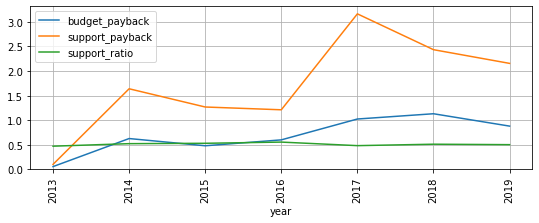

In [165]:
payback=['budget_payback', 'support_payback', 'support_ratio']
data_bud.groupby(['year'])[payback].mean().plot(grid=True,figsize=(9,3),rot=90,ylim=0)

In [166]:
data_bud.groupby('genres_new')['budget_payback'].mean().sort_values(ascending=False).head()

genres_new
спорт        2.41
комедия      1.53
биография    1.14
ужасы        1.05
мультфильм   1.00
Name: budget_payback, dtype: float64

In [167]:
data_bud.groupby('genres_new')['budget_payback'].mean().sort_values().head()

genres_new
детский     0.02
мелодрама   0.04
детектив    0.07
мюзикл      0.16
триллер     0.26
Name: budget_payback, dtype: float64

По отношению сборов к общему бюджету фильма, наиболее окупаемыми являются фильмы жанров спорт, комедия. Наименее окупаемые -детские фильмы и мелодрамы.

In [168]:
data_bud.groupby('genres_new')['ratings'].mean().sort_values(ascending=False).head(10)

genres_new
криминал     7.50
детский      7.12
спорт        6.93
биография    6.90
детектив     6.76
мюзикл       6.55
военный      6.47
драма        6.42
боевик       6.34
фантастика   6.20
Name: ratings, dtype: float64

In [169]:
data_bud.groupby('genres_new')['ratings'].mean().sort_values().head(10)

genres_new
ужасы         5.20
история       5.35
семейный      5.41
комедия       5.52
реальное ТВ   5.60
триллер       5.70
приключения   5.87
мелодрама     5.91
мультфильм    5.91
фэнтези       6.09
Name: ratings, dtype: float64

Наиболее высокие рейтинги у фильмов, относящихся к жанру криминал -7.5, детские фильмы-7.12. Самые низкие рейтинги у фильмов ужасов - 5.2 и исторических фильмов -5.35. У детских фильмов высокий рейтинг, но низкая окупаемость. Скорее всего, это связано стем, что детские фильмы показывают в основном на утренних и дневных сеансах, на которые устанавливаются более низкие цены на билеты и посещают сеансы дети с родителями.

In [170]:
budget_pivot=data_bud.pivot_table(index='genres_new', values=['support_ratio','support_total', 'budget_payback',
                                                        'support_payback', 'budget_mln','ratings'],aggfunc=('mean','count','median'))
budget_pivot.head(10)

budget_mln               budget_payback             ratings       \
                count   mean median          count mean median   count mean   
genres_new                                                                    
nan                15  62.86  46.92             14 0.73   0.01       0  NaN   
биография           3 176.31 131.00              3 1.14   0.32       3 6.90   
боевик              5 120.69 150.00              5 0.59   0.33       5 6.34   
военный             9 142.88 109.81              9 0.86   0.19       9 6.47   
детектив            5 239.64 130.00              5 0.07   0.06       5 6.76   
детский             4  45.97  46.94              3 0.02   0.03       4 7.12   
драма              92 120.13  58.27             86 0.41   0.06      92 6.42   
история             4 536.26 499.92              4 0.56   0.51       4 5.35   
комедия            68  86.99  72.17             67 1.53   0.31      68 5.52   
криминал            3 142.20  59.94              3 0.32   0.23       3 7.50   

                  support_payback             support_ratio              \
           median           count mean median         count mean median   
genres_new                                                                
nan           NaN              14 1.28   0.03            15 0.62   0.65   
биография    6.90               3 5.52   1.90             3 0.35   0.21   
боевик       6.30               5 2.26   1.13             5 0.44   0.41   
военный      6.40               9 2.75   0.50             9 0.41   0.35   
детектив     6.80               5 0.32   0.15             5 0.49   0.56   
детский      7.25               3 0.03   0.04             4 0.65   0.67   
драма        6.40              86 0.96   0.12            92 0.54   0.62   
история      5.90               4 1.10   1.25             4 0.43   0.39   
комедия      5.75              67 3.46   0.71            68 0.53   0.56   
криминал     7.80               3 0.49   0.36             3 0.66   0.66   

           support_total                
                   count   mean median  
genres_new                              
nan                   15  36.67  30.00  
биография              3  37.50  27.51  
боевик                 5  50.80  35.00  
военный                9  46.89  45.00  
детектив               5  97.00  55.00  
детский                4  29.75  29.50  
драма                 92  56.95  30.00  
история                4 255.00 240.00  
комедия               68  43.87  32.50  
криминал               3  93.33  40.00

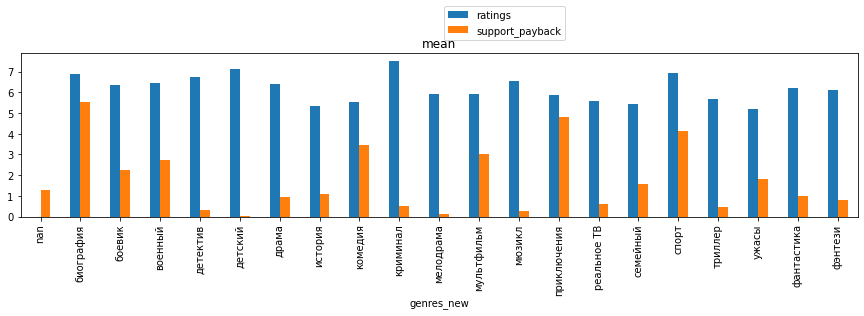

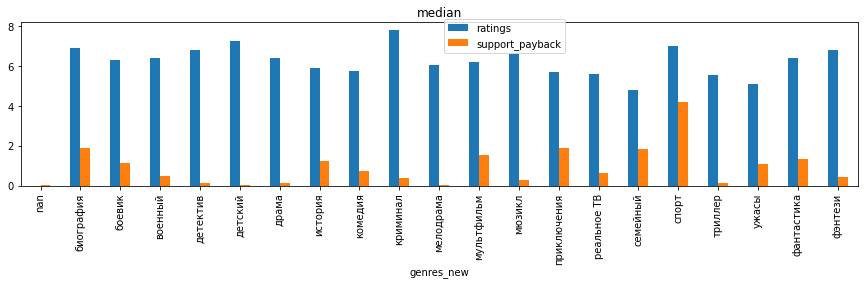

In [171]:
for aggfunc in ['mean','median']: 
    ax=(
        data_bud
        .pivot_table(index='genres_new',values=['support_payback','ratings'],aggfunc=aggfunc)
        .plot(title=aggfunc,kind='bar', figsize=(15,3))
    )
    ax.legend(bbox_to_anchor=(0.5, 1.05))
    plt.show()  

К наиболее успешным жанрам, если рассматривать сборы от проката фильмов к объему государственной поддержки этих фильмов, относятся к жанрам биография, приключения, спорт, комедия. Наименее успешные относительно окупаемости средств государственной поддержки- детские фильмы, мелодрамы, драмы.


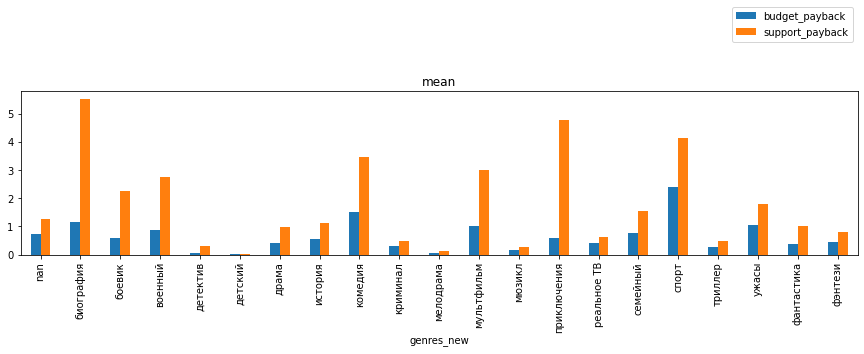

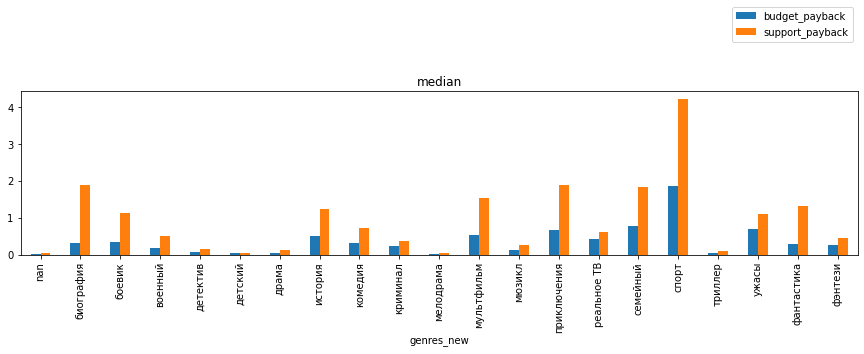

In [172]:
for aggfunc in ['mean','median']: 
    ax=(
        data_bud
        .pivot_table(index='genres_new',values=['budget_payback','support_payback'],aggfunc=aggfunc)
        .plot(title=aggfunc,kind='bar', figsize=(15,3))
    )
    ax.legend(bbox_to_anchor=(1, 1.55))
    plt.show()  

Наиболее окупаемые спортивные фильмы, приключения, семейные фильмы.

In [173]:
genres_sup = pd.DataFrame()
genres_sup['genr_ratings_mean'] = data_bud.groupby('genres_new')['ratings'].mean()
genres_sup['genr_box_office'] = data_bud.groupby('genres_new')['box_office_mln'].mean()
genres_sup['support_genr_count'] = data_bud.groupby('genres_new')['support_total'].count()
genres_sup['support_genr_mean'] = data_bud.groupby('genres_new')['support_total'].mean()                                                                                                                                             
genres_sup['genr_bud_payback_count']= data_bud.groupby('genres_new')['budget_payback'].count()
genres_sup['genr_bud_payback_mean']= data_bud.groupby('genres_new')['budget_payback'].mean()
genres_sup['genr_bud_payback_median']= data_bud.groupby('genres_new')['budget_payback'].median()
genres_sup['total_genres']=data.groupby('genres_new')['title'].count()

genres_sup.sort_values('genr_bud_payback_median', ascending = False)

,genr_ratings_mean,genr_box_office,support_genr_count,support_genr_mean,genr_bud_payback_count,genr_bud_payback_mean,genr_bud_payback_median,total_genres
genres_new,,,,,,,,
спорт,6.93,989.26,3,151.67,3,2.41,1.87,9
семейный,5.41,97.40,7,48.43,6,0.75,0.76,32
ужасы,5.20,71.01,10,35.50,10,1.05,0.71,573
приключения,5.87,200.93,7,99.43,6,0.58,0.68,55
мультфильм,5.91,201.80,26,74.29,25,1.00,0.52,532
история,5.35,363.87,4,255.00,4,0.56,0.51,26
реальное ТВ,5.60,32.72,1,53.00,1,0.41,0.41,1
боевик,6.34,79.87,5,50.80,5,0.59,0.33,616
биография,6.90,172.29,3,37.50,3,1.14,0.32,33


In [174]:
data_bud[(data_bud.budget_payback>=2)&(data_bud.genres_new=='спорт')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,refundable_support_mln,non_refundable_support_mln,box_office_mln,year,genres_new,director_new,support_total,support_ratio,budget_payback,support_payback
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,...,0.00,400.00,"2,779.69",2017,спорт,А.Мегердичев,400.00,0.68,4.71,6.95


Есть случаи, когда медианные значения окупаемости значительно отличаются от средних значений в жанрах спорт, комедия и пр. Выведя срез по жанру спорт, мы видим фильм-миллиардник "Движение вверх", который оказал влияние на такой разброс средних и медианных значений.

***Выводы:***

**Проведено исследование фильмов, которые получили государственную поддержку:**

*Государственную поддержку за исследуемый период получили: -289 художественных фильма в размере 16904.19 (13989.19 из которых составляют невозвратные средства государственной поддержки - non_refundable_support_mln и 2915.0 -возвратные средства государственной поддержки - refundable_support_mln) или 45.7% от budget_mln - общего бюджета художественных фильмов 36966.78; -25 анимационных фильмов в размере 1901.52 (1161.52 -невозвратные средства, 740.0 - возвратные) -36.2% от общего бюджета анимационных фильмов 5240.46; -1 документальный фильм в размере 3.0 (3.0 -невозвратные средства, 0 -возвратные) -9% от бюджета документального фильма 33.0. Сборы составили: -34295.32 от показа художественных фильмов, что составляет 92.8% к общему бюджету художественных фильмов 36966.78; -5044.89 от показа анимационных фильмов или 96.3% к общему бюджету анимационных фильмов 5240.46; -сборы от показа документального фильма - 0 при общем бюджете фильма 33.0.*

*Средняя окупаемость фильмов составляет 93% от общего бюджета фильмов.*

*По годам доля государственной поддержки к общему бюджету фильмов находится примерно на одном уровне - 47-55%. Окупаемость от общего бюджета фильмов менялась по годам -наблюдается рост в 2014-2016 относительно 2013 года, наибольшего пика достигнув в 2017-2018 годах, со снижением в 2019 году. Фильмы с датой премьеры в 2019 году, особенно, если премьера пришлась на конец года, основную часть сборов скорее всего могут получить в 2020 году, по которому у нас нет информации. Кроме того, в 2020 году началась пандемия короновируса, что привело к закрытию и ограничению работы кинотеатров и снижению сборов. По окупаемости средств государственной поддержки динамика по годам схожа с динамикой окупаемости общего бюджета.*

*По отношению сборов к общему бюджету фильма, наиболее окупаемыми являются фильмы жанров спорт, комедия. Наименее окупаемы детские фильмы и мелодрамы.*

### Шаг 5. Напишите общий вывод

**При анализе рынка российского кинопроката выявлены следующие тенденции:**

**Количество фильмов, выходящих в прокат по годам: Наибольшее количество фильмов вышло в прокат в 2010 году - 980, 2019 - 926, 2018 - 879, 2016 - 817, 2014 - 806, 2015 - 705, 2013 - 629, 2011 - 620, 2012 - 592 и 2017 - 505. Больше всего фильмов было выпущено в прокат в 2010 году - 980, а в 2018-2019 годах, 926 и 879 фильмов соответственно. Меньше всего фильмов за анализируемый период было выпущено прокат в 2017 году - 505. Имеющаяся у нас информация о сборах от проката фильмов охватывает не все фильмы. Доля, которую составляют фильмы с указанием информации по сборам составляет 42% от общего числа фильмов.**

**Сумма сборов в зависимости от динамики проката по годам: Самые большие сборы от кинопроката наблюдаются в 2017-2019 годах. В 2018 - 49688.35, 2017 - 48563.73, 2019 - 48435.75. Наименьшее количество сборов от кинопроката в 2010 году - 2.36. В некоторых данных по сборам, приокруглении до млн.руб., составляют менее 1 млн. Таких значений 455 или 6.1% от количества, по которым есть информация и сумма сборов по ним составляет 646892.4 руб. или менее 1% от общей суммы сборов. Наблюдаются большие изменения сборов от проката в зависимости от года выхода фильма в прокат. В 2010-2013 - самые низкие сборы за весь рассматриваемый период. По всей видимости ощущались последствия экономического кризиса 2008 года. В 2014 году -другой кризис, уже внутри страны. С 2014 года наблюдается рост сборов от проката, который достиг пика в 2017 году. Наиболее полно данными представлен период 2015 - 2019 г.**

**Влияние возрастных ограничений аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год: Наибольшее количество фильмов относится к категории "16+" - 2848, наименьшее - к категории "6+" - 623. В период с 2015-2019 наибольшее количество фильмов относится к категории "16+" - 1170, наименьшее - к категории "0+" - 316. Заметно значительное снижение фильмов для категории "0+", относительно фильмов других возрастных категорий. Наибольшие сборы в 2016-2019 годах собрали фильмы возрастной категории "16+" (2016 - 16664.60, 2017 - 18945.02, 2018 - 16503.62). Наименьшее количество сборов у фильмов с возрастной категорией "0+". Во все исследуемые годы с 2015-2019 данная тенденция сохраняется. Скорее всего речь идет о мультфильмах и детских фильмах, идущих в утреннее и дневное время, билеты на которые продаются по более низким ценам. Количество фильмов, выпускаемых в прокат для категории "0+" в период 2017-2019 г значительно снизилось (2015-39, 2016-40, 2017-3, 2018-5, 2019-3. Наибольшее количество фильмов, выпускаемых в прокат - для категорий "16+" и "18+".**

**Влияние государственной поддержки: Государственную поддержку за исследуемый период получили: -289 художественных фильма в размере 16904.19 (13989.19 из которых составляют невозвратные средства государственной поддержки - non_refundable_support_mln и 2915.0 -возвратные средства государственной поддержки - refundable_support_mln) или 45.7% от budget_mln - общего бюджета художественных фильмов 36966.78; -25 анимационных фильмов в размере 1901.52 (1161.52 -невозвратные средства, 740.0 - возвратные) -36.2% от общего бюджета анимационных фильмов 5240.46; -1 документальный фильм в размере 3.0 (3.0 -невозвратные средства, 0 -возвратные) -9% от бюджета документального фильма 33.0. Сборы составили: -34295.32 от показа художественных фильмов, что составляет 92.8% к общему бюджету художественных фильмов 36966.78; -5044.89 от показа анимационных фильмов или 96.3% к общему бюджету анимационных фильмов 5240.46; -сборы от показа документального фильма - 0 при общем бюджете фильма 33.0.Средняя окупаемость фильмов составляет 93% от общего бюджета фильмов. По годам доля государственной поддержки к общему бюджету фильмов находится примерно на одном уровне - 47-55%. Окупаемость от общего бюджета фильмов менялась по годам -наблюдается рост в 2014-2016 относительно 2013 года, наибольшего пика достигнув в 2017-2018 годах, со снижением в 2019 году. Фильмы с датой премьеры в 2019 году, особенно, если премьера пришлась на конец года, основную часть сборов скорее всего могут получить в 2020 году, по которому у нас нет информации. Кроме того, в 2020 году началась пандемия короновируса, что привело к закрытию и ограничению работы кинотеатров и снижению сборов. По окупаемости средств государственной поддержки динамика по годам схожа с динамикой окупаемости общего бюджета. По отношению сборов к общему бюджету фильма, наиболее окупаемыми являются фильмы жанров спорт, комедия. Наименее окупаемы детские фильмы и мелодрамы.**